# Time Series Analysis of Tesla Stock Prices

## Overview
This script performs time series analysis on Tesla's stock price data. It includes:
1. Loading data from a CSV file.
2. Preprocessing and cleaning data.
3. Visualizing stock price trends.
4. Checking for missing values.
5. Performing basic statistical analysis.

## Prerequisites
- Ensure you have `pandas` and `matplotlib` installed.
- The dataset should be available in a GitHub repository and accessible via a direct URL.
"https://www.macrotrends.net/stocks/charts/TSLA/tesla/stock-price-history"

In [356]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import os


# Step 1: Load the dataset from a local file

In [358]:
import pandas as pd

# Load the dataset without parsing dates
file_path = "/Users/disastershubz/Downloads/MacroTrends_Data_Download_TSLA.csv"
df = pd.read_csv(file_path, skiprows=14, )  # Adjust skiprows based on how many metadata rows exist

# Display the first few rows and column names
print(df.head())
print(df.columns)


         date    open    high     low   close     volume
0  2010-06-29  1.2667  1.6667  1.1693  1.5927  281494500
1  2010-06-30  1.7193  2.0279  1.5533  1.5887  257806500
2  2010-07-01  1.6667  1.7280  1.3513  1.4640  123282000
3  2010-07-02  1.5333  1.5400  1.2473  1.2800   77097000
4  2010-07-06  1.3333  1.3333  1.0553  1.0740  103003500
Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')


In [359]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3697 entries, 0 to 3696
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3697 non-null   object 
 1   open    3697 non-null   float64
 2   high    3697 non-null   float64
 3   low     3697 non-null   float64
 4   close   3697 non-null   float64
 5   volume  3697 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 173.4+ KB
None


In [360]:
df["date"] = pd.to_datetime(df["date"])  # Convert to datetime
df.set_index("date", inplace=True)  # Set it as the index


In [361]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3697 entries, 2010-06-29 to 2025-03-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    3697 non-null   float64
 1   high    3697 non-null   float64
 2   low     3697 non-null   float64
 3   close   3697 non-null   float64
 4   volume  3697 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 173.3 KB
None


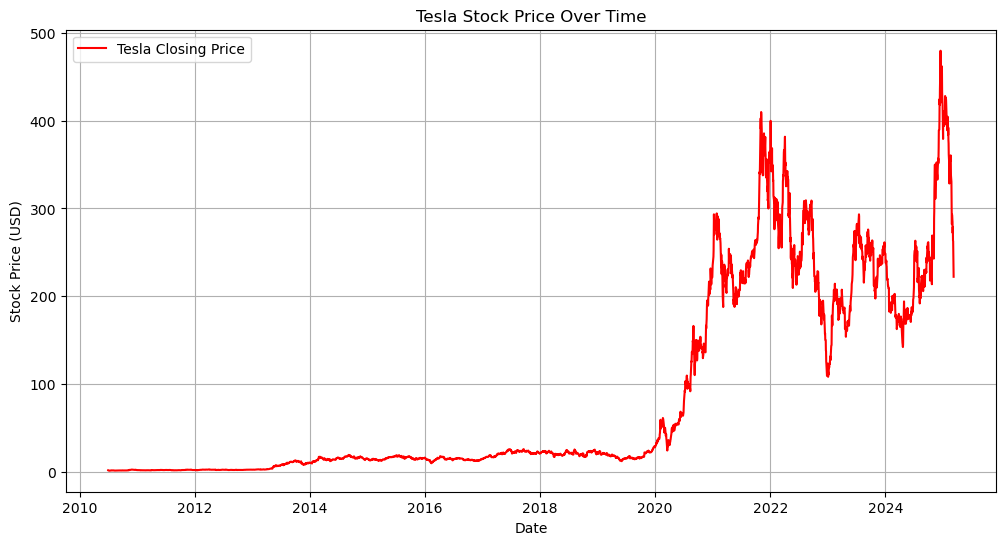

In [362]:
import matplotlib.pyplot as plt

# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["close"], label="Tesla Closing Price", color="red")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Tesla Stock Price Over Time")
plt.legend()
plt.grid(True)
plt.show()


In [363]:
print(df.columns)


Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')


Step 1: Identify Trends in the Data
A trend is a long-term increase or decrease in the data. We can visualize the trend by applying a rolling mean (moving average) to smooth out short-term fluctuations.

✅ Let's calculate and plot a moving average to highlight the trend:

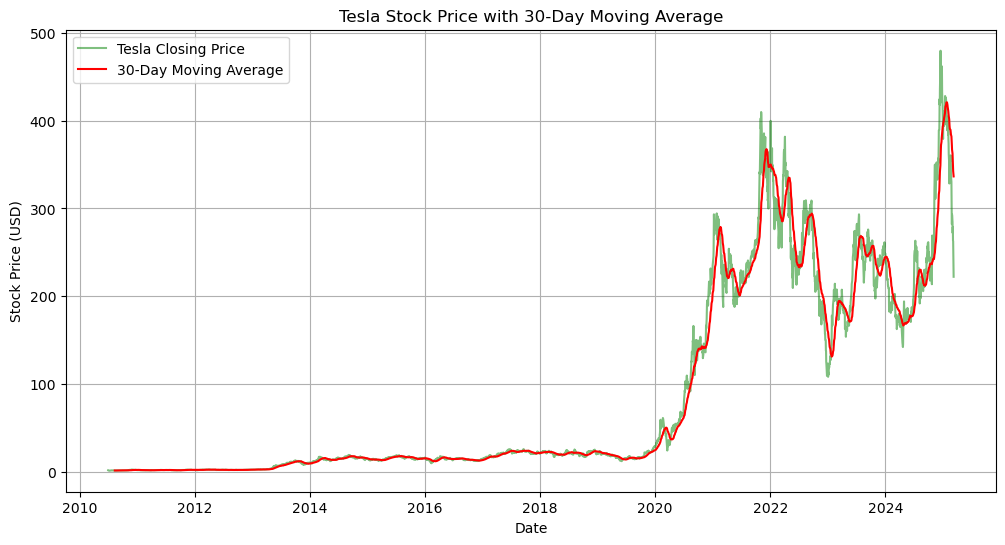

In [365]:
df["30-day MA"] = df["close"].rolling(window=30).mean()  # Use correct case

# Plot the stock prices with moving average
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["close"], label="Tesla Closing Price", color="green", alpha=0.5)
plt.plot(df.index, df["30-day MA"], label="30-Day Moving Average", color="red")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Tesla Stock Price with 30-Day Moving Average")
plt.legend()
plt.grid(True)
plt.show()


Next Step: Checking for Seasonality & Decomposing the Time Series
Seasonality refers to recurring patterns in data at specific time intervals (e.g., monthly or yearly cycles).

✅ Step 1: Decompose the Time Series
We'll use Seasonal Decomposition of Time Series (STL Decomposition) to break down the stock prices into:

Trend – The long-term movement.
Seasonality – Repeated patterns.
Residual (Noise) – The random fluctuations.

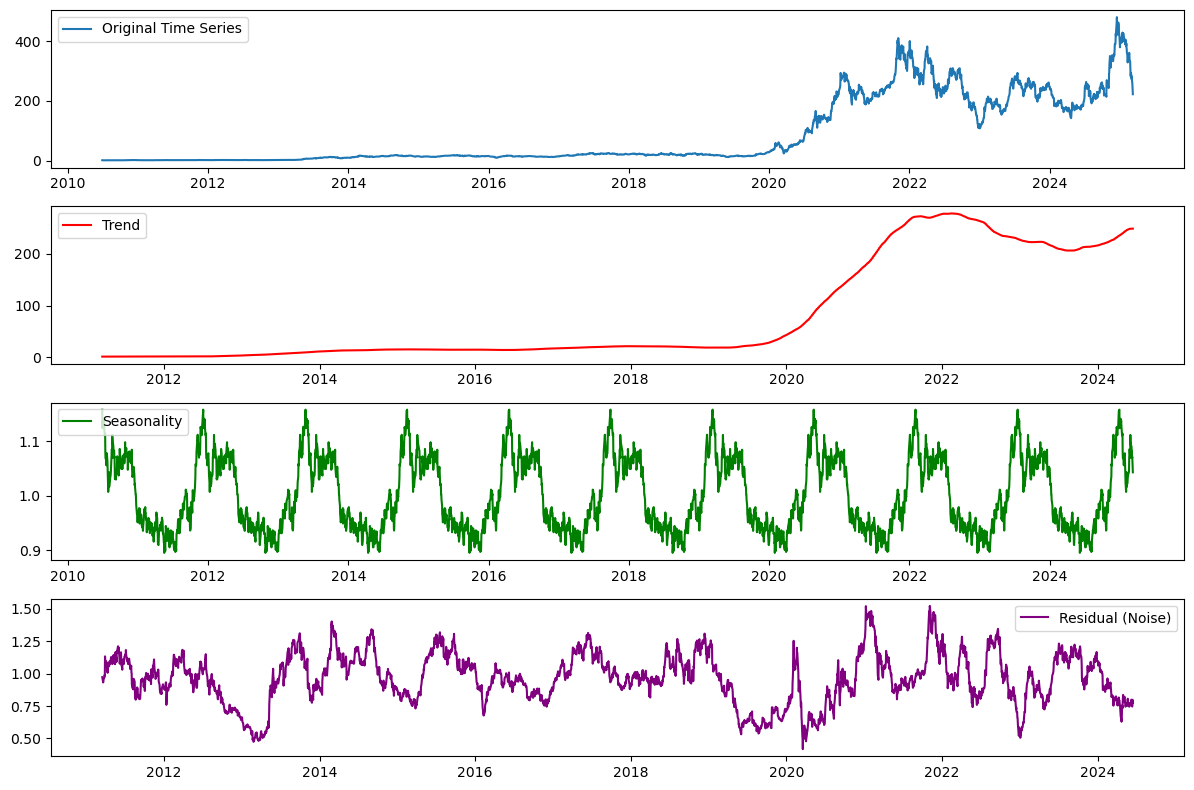

In [367]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition (multiplicative model works well for stock prices)
decomposition = seasonal_decompose(df["close"], model="multiplicative", period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df.index, df["close"], label="Original Time Series")
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label="Trend", color="red")
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label="Seasonality", color="green")
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label="Residual (Noise)", color="purple")
plt.legend()

plt.tight_layout()
plt.show()


Original Time Series (Top Plot)

This is the raw Tesla stock price data.
We can see a clear upward trend, especially after 2019.
There are fluctuations, but a general increase over time.
Trend (Second Plot - Red Line)

This shows the long-term direction of the stock price.
Notice the sharp rise from 2019 to 2022, followed by a slight dip and recovery.
This confirms that Tesla's stock had a strong growth phase.
Seasonality (Third Plot - Green Line)

This represents recurring patterns over time.
The peaks and troughs suggest seasonal fluctuations, possibly linked to market cycles, earnings reports, or external economic conditions.
Residual (Fourth Plot - Purple Line)

This represents random noise that is not explained by trend or seasonality.
If the noise is high, it means there are unpredictable events affecting the stock price.


Next Step: Testing for Stationarity
Before we apply forecasting models, we need to check if the time series is stationary (i.e., constant mean and variance over time).

📌 We’ll use the Augmented Dickey-Fuller (ADF) Test to determine this.

In [370]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(df["close"])

# Print the results
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:", adf_test[4])

# Check for stationarity
if adf_test[1] < 0.05:
    print("The time series is stationary (reject null hypothesis).")
else:
    print("The time series is NOT stationary (fail to reject null hypothesis).")


ADF Statistic: -1.64161158938731
p-value: 0.46141881502264626
Critical Values: {'1%': -3.4321340464121652, '5%': -2.8623282926072906, '10%': -2.567189619905243}
The time series is NOT stationary (fail to reject null hypothesis).


Interpretation of Your Results:
ADF Statistic: -1.6416 → Not low enough to indicate stationarity.
p-value: 0.4614 → Much greater than 0.05, meaning we fail to reject the null hypothesis (i.e., the time series is not stationary).
Critical Values: Our ADF statistic is not lower than the critical values, further confirming that the series is non-stationary.
What This Means:
Since the data is not stationary, it cannot be directly used for models like ARIMA, which assume stationarity. We need to transform the data to make it stationary.



Next Step: Making the Time Series Stationary
We will apply differencing to remove the trend and stabilize the variance.

1st Order Differencing:

In [373]:
# Apply first-order differencing
df["close_diff"] = df["close"].diff()

# Drop missing values (NaN in first row due to differencing)
df.dropna(inplace=True)

# Re-run the ADF test on differenced data
adf_test_diff = adfuller(df["close_diff"])

# Print results
print("ADF Statistic (After Differencing):", adf_test_diff[0])
print("p-value:", adf_test_diff[1])
print("Critical Values:", adf_test_diff[4])

if adf_test_diff[1] < 0.05:
    print("The time series is now stationary (reject null hypothesis).")
else:
    print("The time series is STILL not stationary.")


ADF Statistic (After Differencing): -10.236983448105418
p-value: 4.8601484103621085e-18
Critical Values: {'1%': -3.4321477795421935, '5%': -2.8623343588485692, '10%': -2.5671928493690377}
The time series is now stationary (reject null hypothesis).


Interpretation of Results:
ADF Statistic: -10.2369 → Much lower than all critical values, indicating strong stationarity.
p-value: 4.86e-18 (< 0.05) → We reject the null hypothesis, confirming that the series is now stationary.
Conclusion: The data is ready for forecasting models like ARIMA!

Now that the data is stationary, we can apply time series model to forecast future stock prices.

Plan of Action:
ARIMA (AutoRegressive Integrated Moving Average)

Best for non-seasonal time series.
Captures trend & autocorrelations but not strong seasonality.
Steps:
Model Selection using Auto-ARIMA (automatically finds best parameters).
Fit the ARIMA model.
Make and visualize predictions.


SARIMA (Seasonal ARIMA)
Extension of ARIMA that also captures seasonality.
Useful when data has recurring seasonal patterns.

Prophet Model (Developed by Facebook)

Handles trend & seasonality easily.
Works well with missing data and irregular time series.


Step 1: Install pmdarima (for Auto-ARIMA)
Run this in your terminal or notebook:

In [378]:
!pip install pmdarima


python(61832) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Step 2: Find Best ARIMA Parameters


In [380]:
from pmdarima import auto_arima

# Auto-ARIMA to determine best (p, d, q) parameters
model_autoARIMA = auto_arima(df["close"], seasonal=False, stepwise=True, suppress_warnings=True)

# Display the best parameters
print(model_autoARIMA.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3668
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -11403.575
Date:                Wed, 12 Mar 2025   AIC                          22817.150
Time:                        10:19:51   BIC                          22848.186
Sample:                             0   HQIC                         22828.200
                               - 3668                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3729      0.180      2.076      0.038       0.021       0.725
ar.L2          0.4874      0.181      2.698      0.007       0.133       0.841
ma.L1         -0.3846      0.184     -2.093      0.0

our Auto-ARIMA model has suggested an ARIMA(2,1,2) model, meaning:

p (AR order) = 2 → The model uses two past values (lags) to predict the future.

d (Differencing order) = 1 → The model differenced once to make the series stationary.

q (MA order) = 2 → The model uses two past forecast errors for correction.

Next Step: Fit the ARIMA Model & Forecast
Now, let's train the ARIMA(2,1,2) model and forecast future stock prices.

Step 1: Install statsmodels (if not installed)

In [383]:
!pip install statsmodels


python(61840) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Step 2: Fit the ARIMA Model


In [385]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model using the best parameters (2,1,2)
arima_model = ARIMA(df["close"], order=(2,1,2))
arima_fit = arima_model.fit()

# Print model summary
print(arima_fit.summary())


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 3668
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -11403.575
Date:                Wed, 12 Mar 2025   AIC                          22817.150
Time:                        10:19:53   BIC                          22848.186
Sample:                             0   HQIC                         22828.200
                               - 3668                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3729      0.180      2.076      0.038       0.021       0.725
ar.L2          0.4874      0.181      2.698      0.007       0.133       0.841
ma.L1         -0.3846      0.184     -2.093      0.0

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


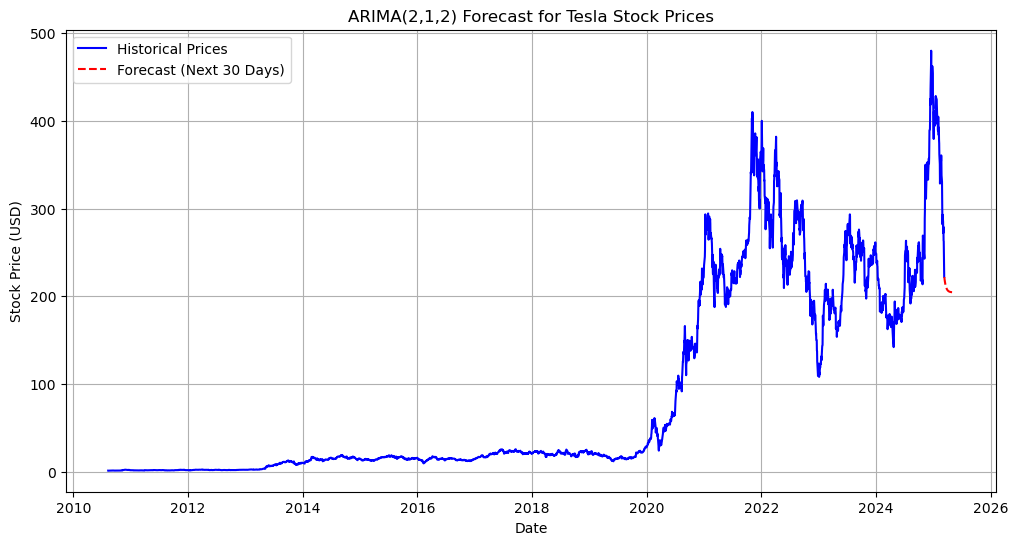

In [386]:
import numpy as np

# Forecast next 60 days
forecast_steps = 60
forecast = arima_fit.forecast(steps=forecast_steps)

# Create future dates for plotting
future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq="D")[1:]

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["close"], label="Historical Prices", color="blue")
plt.plot(future_dates, forecast, label="Forecast (Next 30 Days)", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("ARIMA(2,1,2) Forecast for Tesla Stock Prices")
plt.legend()
plt.grid(True)
plt.show()


Next Step: Evaluating ARIMA Performance

Interpreting the ARIMA Forecast
Did the forecast follow the trend?

Does it continue the historical movement, or does it show unexpected jumps?

If there are unexpected patterns, it could mean ARIMA alone is not capturing all aspects.

How does the confidence interval look?

If you want to visualize the confidence intervals, you can modify the forecast code:

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


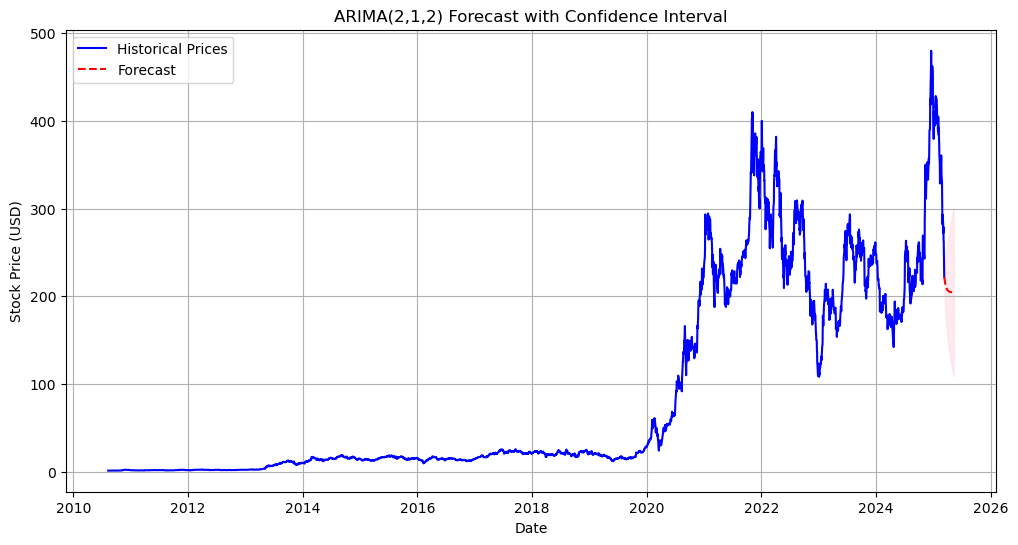

In [389]:
pred = arima_fit.get_forecast(steps=60)
pred_ci = pred.conf_int()

plt.figure(figsize=(12,6))
plt.plot(df.index, df["close"], label="Historical Prices", color="blue")
plt.plot(future_dates, pred.predicted_mean, label="Forecast", color="red", linestyle="dashed")
plt.fill_between(future_dates, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color="pink", alpha=0.3)
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("ARIMA(2,1,2) Forecast with Confidence Interval")
plt.legend()
plt.grid(True)
plt.show()


This will show uncertainty in predictions—helpful in finance!

Next Step: Handling Seasonality with SARIMA


If you noticed repeated seasonal patterns in Tesla’s stock prices (as seen in decomposition earlier), ARIMA alone may not be enough.

Why Use SARIMA?
SARIMA = Seasonal ARIMA → Extends ARIMA to explicitly model seasonality.
    
It introduces additional seasonal parameters:

(p, d, q) × (P, D, Q, S) where:

(P, D, Q) are seasonal orders (like ARIMA but for seasonality).

S is the seasonal period (e.g., 12 for monthly, 365 for yearly).

In [393]:
from pmdarima import auto_arima

# Auto-SARIMA to find the best parameters (includes seasonality)
sarima_model = auto_arima(df["close"], seasonal=True, m=30, stepwise=True, suppress_warnings=True)
#Display the best seasonal parameters
print(sarima_model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3668
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -11408.490
Date:                Wed, 12 Mar 2025   AIC                          22818.979
Time:                        10:20:30   BIC                          22825.187
Sample:                             0   HQIC                         22821.189
                               - 3668                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        29.4998      0.233    126.831      0.000      29.044      29.956
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):             36944.23
Prob(Q):                              0.46   Pr

Auto-SARIMA model has suggested a SARIMA(0,1,0) × (0,0,0,30) model, meaning:

p = 0, d = 1, q = 0 → A very basic ARIMA model (essentially just differencing with no AR/MA terms).
(P, D, Q, S) = (0,0,0,30) → No significant seasonal component detected with a 30-day cycle.


 Manually Fit a SARIMA Model

In [396]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define a manual SARIMA model
sarima = SARIMAX(df["close"], order=(2,1,2), seasonal_order=(1,1,1,12))

# Fit the model
sarima_fit = sarima.fit()

# Print the model summary
print(sarima_fit.summary())


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.22888D+00    |proj g|=  5.94038D-02


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.11580D+00    |proj g|=  3.55018D-02

At iterate   10    f=  3.11267D+00    |proj g|=  1.45712D-02

At iterate   15    f=  3.10826D+00    |proj g|=  4.02434D-03

At iterate   20    f=  3.10814D+00    |proj g|=  2.48034D-04

At iterate   25    f=  3.10807D+00    |proj g|=  3.56594D-03

At iterate   30    f=  3.10759D+00    |proj g|=  6.84369D-03

At iterate   35    f=  3.10742D+00    |proj g|=  7.91100D-04

At iterate   40    f=  3.10733D+00    |proj g|=  1.20063D-03

At iterate   45    f=  3.10731D+00    |proj g|=  1.33453D-04


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  3.10730D+00    |proj g|=  1.30015D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     56      1     0     0   1.300D-03   3.107D+00
  F =   3.1073014357889708     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                      SARIMAX Results                                       
Dep. Variable:                                close   No. Observations:                 3668
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood              -11397.582
Date:                              Wed, 12 Mar 2025   AIC                         

nterpretation of SARIMA Model Results
Model Summary:

Order: (2,1,2) → Uses 2 autoregressive terms (AR), 1 differencing step (I), and 2 moving average terms (MA).

Seasonal Order: (1,1,1,12) → Seasonal component with 1 AR, 1 differencing, and 1 MA term, with a 12-period seasonality.

AIC = 22809.163 → AIC helps compare models (lower is better).

Key Coefficients:

AR.L1 = -0.1214, AR.L2 = 0.8643 → Past values influence the forecast.

MA.L1 = 0.1428, MA.L2 = -0.8491 → Past errors also influence predictions.

ar.S.L12 = 0.0194, ma.S.L12 = -0.9864 → Seasonal component is significant.



Forecast Future Stock Prices using SARIMA


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


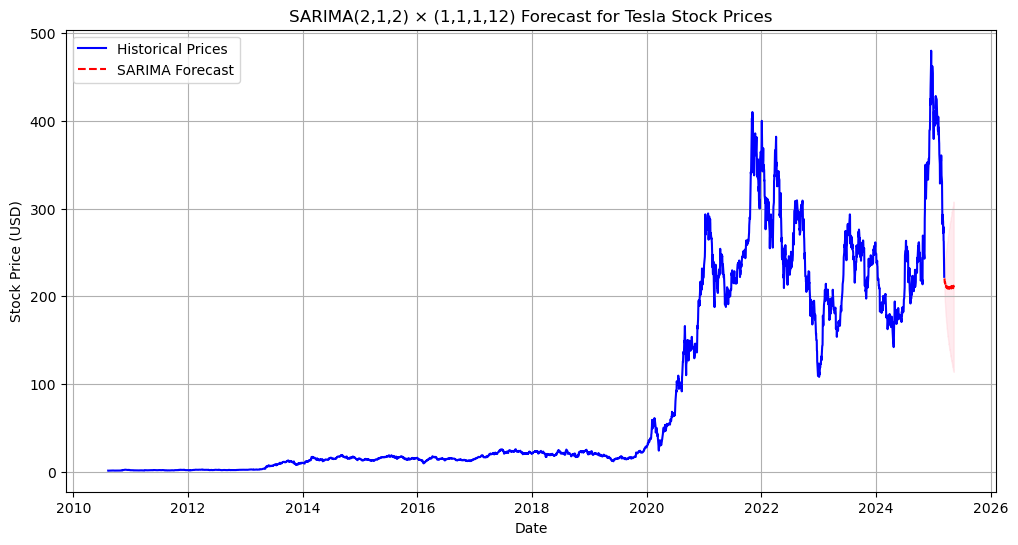

In [399]:
# Forecasting for the next 30 days
forecast_steps = 60
sarima_forecast = sarima_fit.get_forecast(steps=forecast_steps)
forecast_ci = sarima_forecast.conf_int()  # Confidence intervals

# Create future dates
future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq="D")[1:]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["close"], label="Historical Prices", color="blue")
plt.plot(future_dates, sarima_forecast.predicted_mean, label="SARIMA Forecast", color="red", linestyle="dashed")
plt.fill_between(future_dates, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="pink", alpha=0.3)
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("SARIMA(2,1,2) × (1,1,1,12) Forecast for Tesla Stock Prices")
plt.legend()
plt.grid(True)
plt.show()


Install & Import Facebook Prophet

In [401]:
!pip install prophet


python(61861) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [402]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


Step 2: Prepare Data for Prophet

Prophet requires two columns:

"ds" → Date (datetime format)
"y" → The target variable (closing price)



In [405]:
# Prepare data for Prophet
df_prophet = df.reset_index()[["date", "close"]]
df_prophet.rename(columns={"date": "ds", "close": "y"}, inplace=True)

# Check the first few rows
print(df_prophet.head())


          ds       y
0 2010-08-10  1.2687
1 2010-08-11  1.1933
2 2010-08-12  1.1733
3 2010-08-13  1.2213
4 2010-08-16  1.2520


Step 3: Train the Prophet Model

In [407]:
# Initialize the Prophet model
prophet_model = Prophet()

# Fit the model
prophet_model.fit(df_prophet)


10:20:47 - cmdstanpy - INFO - Chain [1] start processing
python(61862) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
10:20:47 - cmdstanpy - INFO - Chain [1] done processing


Step 4: Make a 180-Day Forecast

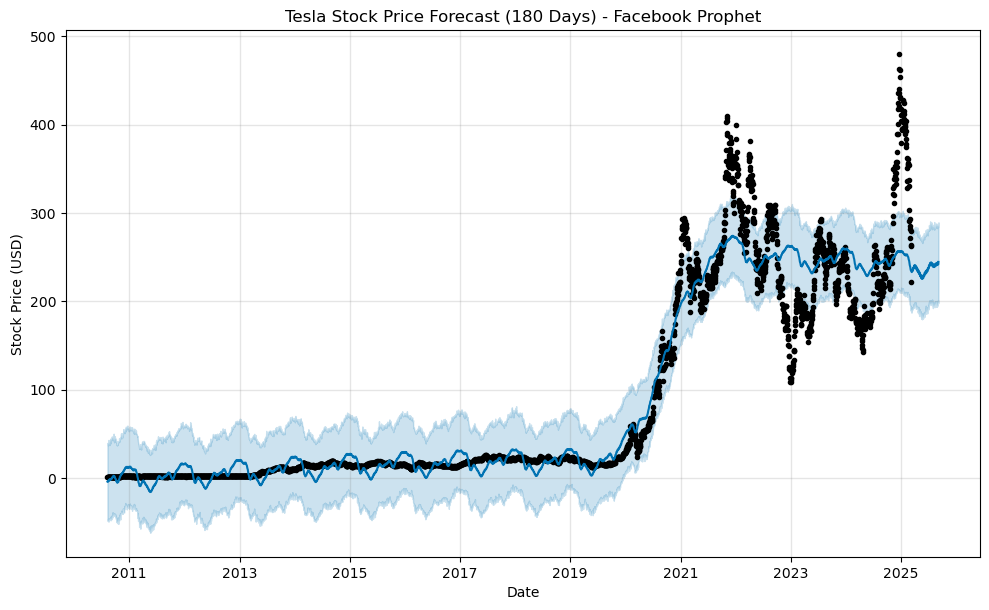

In [409]:
# Create future dates for prediction (180 days ahead)
future = prophet_model.make_future_dataframe(periods=180)

# Predict future stock prices
forecast = prophet_model.predict(future)

# Plot forecast
fig = prophet_model.plot(forecast)
plt.title("Tesla Stock Price Forecast (180 Days) - Facebook Prophet")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.grid(True)
plt.show()


1️⃣ Overall Trend (Blue Line)

The blue line represents the model’s predicted trend.
It captures major growth patterns, showing a stable trend with fluctuations after 2023.
Prophet assumes that stock prices will continue moving within a predictable range, following past patterns.

2️⃣ Confidence Interval (Shaded Light Blue Area)
The light blue shaded region represents uncertainty in the forecast.
Wide confidence intervals suggest that:
Market volatility is high.
The model is less confident in predicting long-term movements.
As time progresses, the uncertainty increases, meaning the model expects more variation.

3️⃣ Black Dots (Historical Data)
The black dots show actual stock prices over time.
Notice how high volatility from 2020 onward caused wider uncertainty in the forecast.
Past fluctuations influence Prophet’s future predictions, leading to a more conservative trend.

Step 5: Check Forecast Components
This will show trend, seasonality, and holidays:

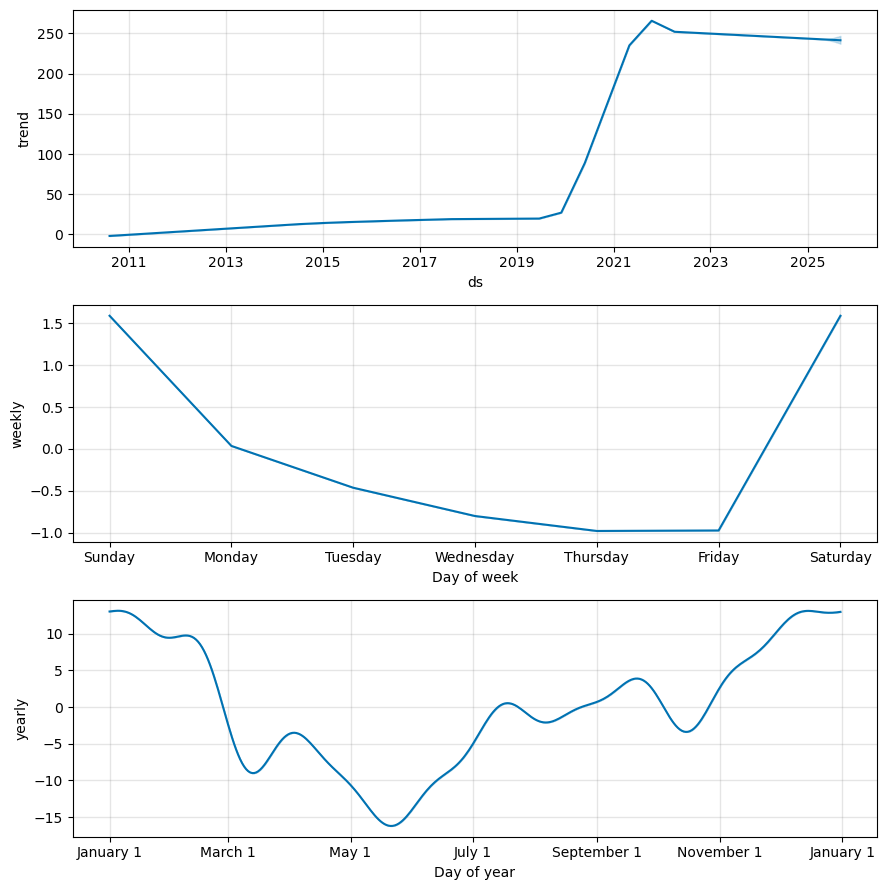

In [412]:
fig2 = prophet_model.plot_components(forecast)
plt.show()


In [490]:


# Check dataset
print(df_prophet.head())


          ds       y
0 2010-08-10  1.2687
1 2010-08-11  1.1933
2 2010-08-12  1.1733
3 2010-08-13  1.2213
4 2010-08-16  1.2520


10:26:43 - cmdstanpy - INFO - Chain [1] start processing
python(62121) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
10:26:43 - cmdstanpy - INFO - Chain [1] done processing


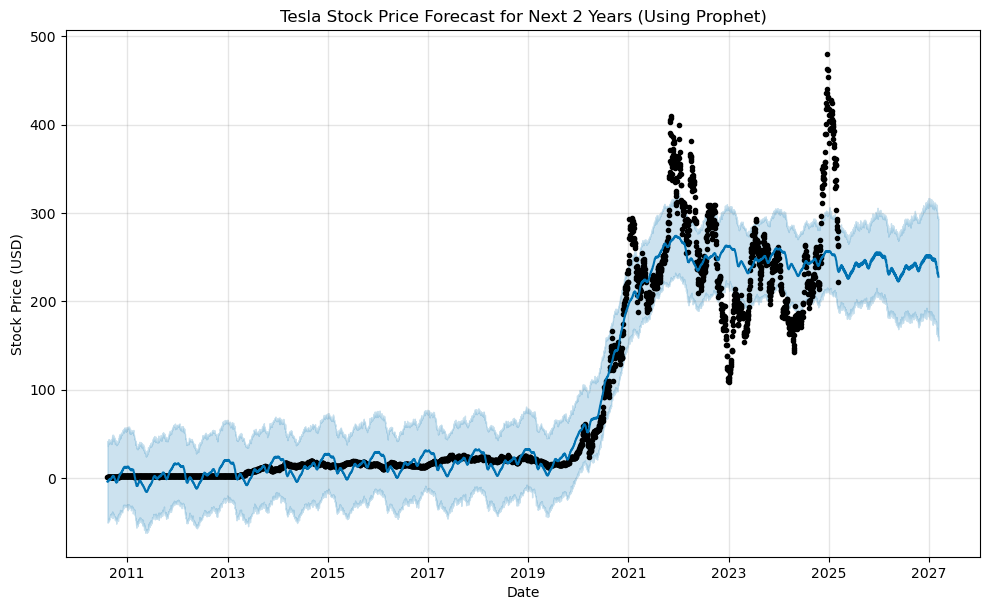

In [492]:
# Initialize Prophet model
prophet_model = Prophet()

# Fit the model
prophet_model.fit(df_prophet)

# Create future dates for prediction (next 2 years)
future = prophet_model.make_future_dataframe(periods=730)  # 730 days (2 years)

# Predict future stock prices
forecast = prophet_model.predict(future)

# Plot forecast
fig = prophet_model.plot(forecast)
plt.title("Tesla Stock Price Forecast for Next 2 Years (Using Prophet)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.grid(True)
plt.show()


10:27:08 - cmdstanpy - INFO - Chain [1] start processing
python(62129) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
10:27:09 - cmdstanpy - INFO - Chain [1] done processing


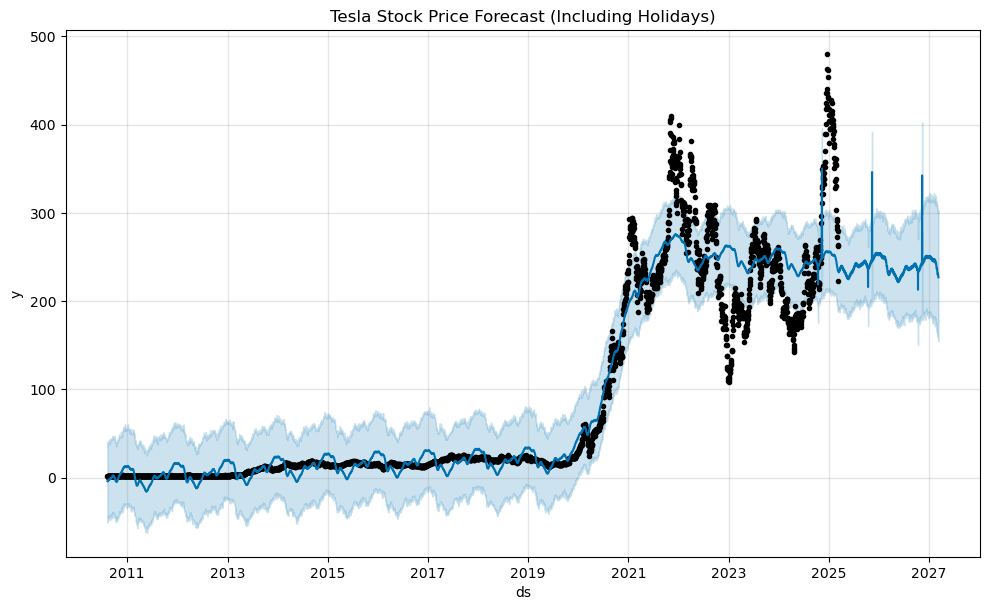

In [494]:
from prophet.make_holidays import make_holidays_df

# Generate US stock market holidays for 2024-2026
holidays = make_holidays_df(year_list=[2024, 2025, 2026], country="US")

# Add holidays to Prophet model
prophet_model = Prophet(holidays=holidays)
prophet_model.fit(df_prophet)

# Predict again
future = prophet_model.make_future_dataframe(periods=730)
forecast = prophet_model.predict(future)

# Plot again
fig = prophet_model.plot(forecast)
plt.title("Tesla Stock Price Forecast (Including Holidays)")
plt.show()


In [543]:
 df.columns

Index(['open', 'high', 'low', 'y', 'volume', '30-day MA', 'close_diff',
       'residuals', 'residuals_scaled', 'lag_1', 'sarima_trend', 'lag_7',
       'lag_30'],
      dtype='object')

 LSTM Code for Residual Forecasting